In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_excel("customer_churn_.xlsx")
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
29008,29009,Customer_29009,61,Female,Chicago,8,49.09,173,1
14929,14930,Customer_14930,33,Female,Houston,20,41.92,99,0
44619,44620,Customer_44620,60,Female,Houston,14,64.89,161,1
15971,15972,Customer_15972,51,Male,New York,19,41.79,433,0
66076,66077,Customer_66077,53,Male,Miami,3,41.45,172,1


In [5]:
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis='columns', inplace=True)
else:
    print("The 'CustomerID' column does not exist in the DataFrame.")
if 'Name' in df.columns:
    df.drop('Name', axis='columns', inplace=True)
else:
    print("The 'Name' column does not exist in the DataFrame.")

df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

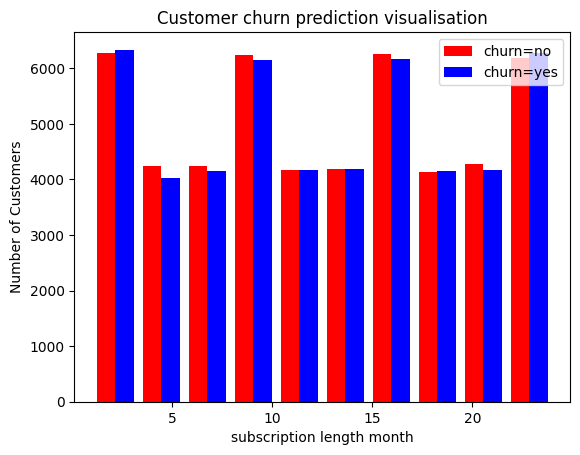

In [4]:
Subscription_Length_Months_no = df[df.Churn==0].Subscription_Length_Months
Subscription_Length_Months_yes = df[df.Churn==1].Subscription_Length_Months	
plt.xlabel("subscription length month")
plt.ylabel("Number of Customers")
plt.title("Customer churn prediction visualisation")

plt.hist([Subscription_Length_Months_no,Subscription_Length_Months_yes],color=['red','blue'],label=["churn=no","churn=yes"])
plt.legend()

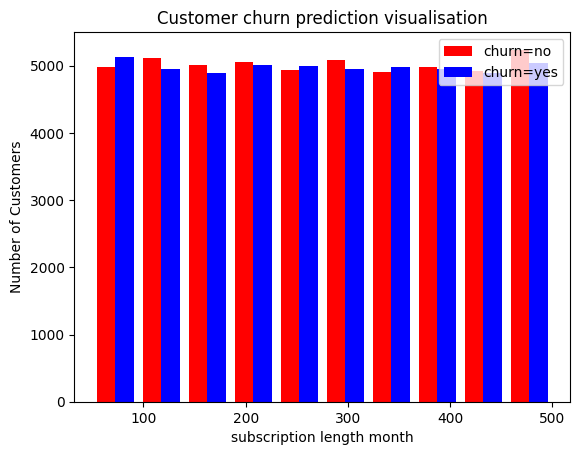

In [5]:
Subscription_Length_Months_no = df[df.Churn==0].Total_Usage_GB
Subscription_Length_Months_yes = df[df.Churn==1].Total_Usage_GB
plt.xlabel("subscription length month")
plt.ylabel("Number of Customers")
plt.title("Customer churn prediction visualisation")

plt.hist([Subscription_Length_Months_no,Subscription_Length_Months_yes],color=['red','blue'],label=["churn=no","churn=yes"])
plt.legend()

In [6]:
def print_unique_col_valies(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

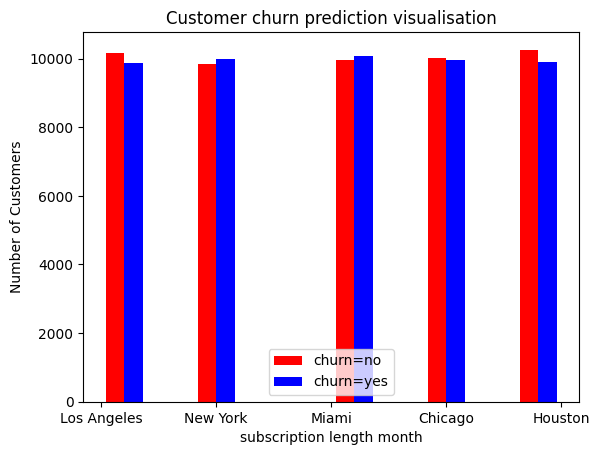

In [7]:
Subscription_Length_Months_no = df[df.Churn==0].Location
Subscription_Length_Months_yes = df[df.Churn==1].Location
plt.xlabel("subscription length month")
plt.ylabel("Number of Customers")
plt.title("Customer churn prediction visualisation")

plt.hist([Subscription_Length_Months_no,Subscription_Length_Months_yes],color=['red','blue'],label=["churn=no","churn=yes"])
plt.legend()

In [8]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df['Gender'].unique()

array([0, 1], dtype=int64)

In [9]:
df1=pd.get_dummies(data=df,columns=['Location'])
df1.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York'],
      dtype='object')

In [10]:
df1.dtypes

Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                uint8
Location_Houston                uint8
Location_Los Angeles            uint8
Location_Miami                  uint8
Location_New York               uint8
dtype: object

In [11]:
df1.sample(3)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
54986,63,1,9,62.34,180,1,1,0,0,0,0
85757,27,1,9,75.45,494,0,0,0,0,1,0
32119,31,1,8,95.26,271,1,0,0,0,0,1


In [12]:
cols_to_scale=["Age","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])


In [13]:
df1.sample(3)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
20148,0.442308,1,0.869565,0.637429,0.502222,0,0,0,0,0,1
53250,0.807692,0,0.913043,0.721857,0.704444,1,0,0,0,1,0
79325,0.538462,0,0.869565,0.837571,0.560000,1,1,0,0,0,0


In [14]:
x=df1.drop('Churn',axis='columns')
y=df1['Churn']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
x_train.shape

(80000, 10)

In [17]:
x_test.shape

(20000, 10)

In [18]:
x_train[:10]


,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
46628,0.288462,0,0.652174,0.100571,0.264444,0,0,1,0,0
92846,0.442308,0,0.304348,0.797429,0.075556,0,0,0,1,0
30440,0.442308,1,0.565217,0.681429,0.771111,0,1,0,0,0
79978,0.076923,0,0.478261,0.547000,0.288889,0,0,0,1,0
85038,0.230769,0,0.739130,0.817857,1.000000,0,0,1,0,0
48616,0.730769,0,0.043478,0.319429,0.813333,0,0,0,0,1
77987,0.788462,1,0.173913,0.669286,0.622222,0,0,0,1,0
61879,0.403846,0,0.130435,0.129429,0.784444,0,0,0,0,1
86215,0.134615,1,0.565217,0.574000,0.688889,0,0,0,1,0
38620,0.884615,0,0.173913,0.543571,0.946667,0,0,0,1,0


In [19]:
len(x_train.columns)

10

In [20]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(10,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6941 - accuracy: 0.4997
Epoch 2/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6933 - accuracy: 0.5047
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5031
Epoch 4/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5068
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5069
Epoch 6/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5089
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5051
Epoch 8/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5082
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5062
Epoch 10/100
2500/2500 [==============================] - 4s 1ms/step - l

In [21]:
model.evaluate(x_test,y_test)

625/625 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.4970


[0.6939324140548706, 0.4969500005245209]

In [22]:
yp = model.predict(x_test)
yp[:5]

625/625 [==============================] - 1s 977us/step


array([[0.48379686],
       [0.50609297],
       [0.48056093],
       [0.491394  ],
       [0.47241023]], dtype=float32)

In [23]:
y_pred=[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
y_pred[:20]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55      9950
           1       0.50      0.39      0.43     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



Text(95.72222222222221, 0.5, 'Truth')

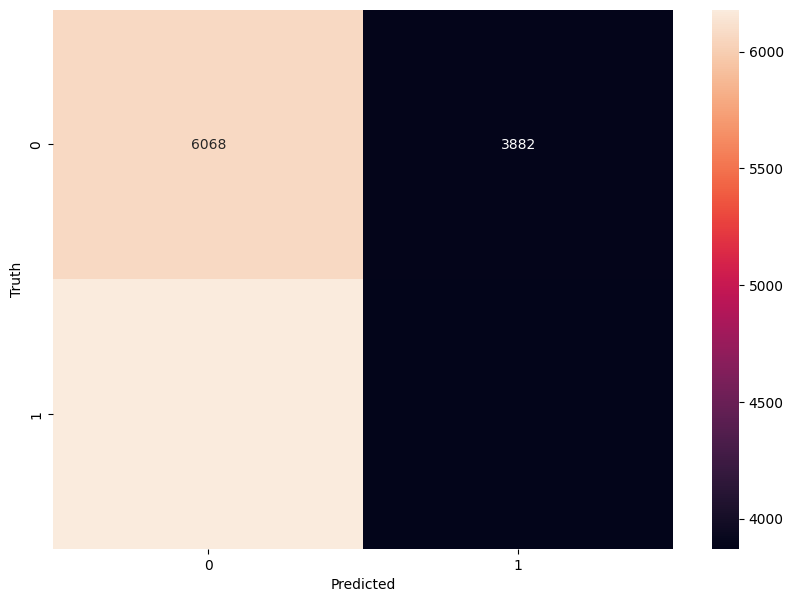

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
round((862+229)/(862+229+137+179),2)

0.78

In [28]:
round(862/(862+179),2)

0.83

In [29]:
round(229/(229+137),2)

0.63